## Importing libraries

First we will import libraries needed. In order to improve the understanding of the algorithms, we will use the numpy library.
Then we will use the well known matplotlib, for the graphical representation of the algorithms.

In [217]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Now we will generate the samples, which will be a number of 2D elements, and then will generate the candidate centers, which number will be of 4 2D elements. 

[infobox] In order to generat a sampleset, Normally  a random number generator is used, but in this case we want to set the samples to predetermined numbers, so you will be able to generate your own algorithms, and test the class assignation based on it. 

In [218]:
samples=np.array([[1,2],[12,2],[0,1],[10,0],[9,1],[8,2],[0,10],[1,8],[2,9],[9,9],[10,8],[8,9] ], dtype=np.float)
centers=np.array([[3,2], [2,6], [9,3], [7,6]], dtype=np.float)
N=len(samples)

Lets represent the samples an center. First we will initialize a new matplotlib figure, with the corresponding axes. The fig object will allow us to change all the figure

The plt and ax variable names are almost an standarized way to refer to this objects

So let's try to have an idea of how the samples look like. This will be done through the matplotlib's scatter drawing type. It takes as parameters the x coordinates, the y coordinates, size (in points squared) the marker type, color, etc.

[infobox] There is a variety of markers to choose from, like point (.), circle (o), square (s). To see the full list see: https://matplotlib.org/api/markers_api.html

[]

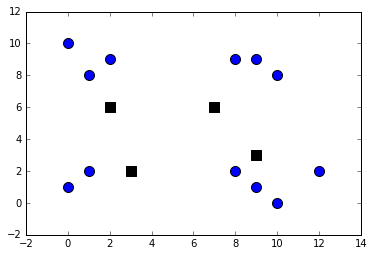

In [219]:
fig, ax = plt.subplots()
ax.scatter(samples.transpose()[0], samples.transpose()[1], marker = 'o', s = 100 )
ax.scatter(centers.transpose()[0], centers.transpose()[1], marker = 's', s = 100, color='black')
plt.plot()

Let's define a function that, given a new sample, will return a list with the distances whith all the current centroids, in order to assign this new sample to one of them, and aterwards, recalculate the centroids again.

In [220]:
def distance (sample, centroids):
    distances=np.zeros(len(centroids))
    for i in range(0,len(centroids)):
        dist=np.sqrt(sum(pow(np.subtract(sample,centroids[i]),2)))
        distances[i]=dist
    return distances

Lest define a function which will build, one by one, the step by step graphic of our application.
It expects a maximum of 12 subpictures, and the plotnumber parameter will determine the position on tha 6x2 matrix (620 will be the first left subplot, and so on writing order)
Then for each picure we will do a scatterplot of the clustered samples, and then of the current centroid position.

In [221]:
def showcurrentstatus (samples, centers, clusters, plotnumber):
    plt.subplot(620+plotnumber)
    plt.scatter(samples.transpose()[0], samples.transpose()[1], marker = 'o', s = 150 , c=clusters)
    plt.scatter(centers.transpose()[0], centers.transpose()[1], marker = 's', s = 100, color='black')
    plt.plot()

The following function, will use the previous distance function and we will have an auxiliary clusters array, in which we will store to which centroid the new sample is assigned (it will be a number from 1 to K).
The main loop will go from sample 0 to N, and for each one, it will look for the closest centroid, assign the centroid number to index n of the clusters array, and sums the sample coordinates to its currently assigned centroid.
Then, to get the sample, we use the bincount method to count the number of samples or each centroid, and will get the divisor array, then we divide the sum of a class elements by the previous divisor array, and there we have the new centroids.


In [222]:
def kmeans_old(centroids, samples, K):
    distances=np.zeros((N,K))
    new_centroids=np.zeros((K, 2))
    clusters=np.zeros(len(samples), np.int)
    
    for i in range(0,len(samples)):
        distances[i] = distance(samples[i], centroids)
        clusters[i] = np.argmin(distances[i])
        new_centroids[clusters[i]] += samples[i]        
    divisor = np.bincount(clusters).astype(np.float)
    for i in range(0,K):
        new_centroids[i] = np.nan_to_num(np.divide(new_centroids[i] ,divisor[i]))
    showcurrentstatus(samples, new_centroids, clusters)
    return new_centroids    

In [223]:
def kmeans(centroids, samples, K, plotresults):
    plt.figure(figsize=(20,20))
    distances=np.zeros((N,K))
    new_centroids=np.zeros((K, 2))
    final_centroids=np.zeros((K, 2))
    clusters=np.zeros(len(samples), np.int)
    
    for i in range(0,len(samples)):
        distances[i] = distance(samples[i], centroids)
        clusters[i] = np.argmin(distances[i])
        new_centroids[clusters[i]] += samples[i]        
        divisor = np.bincount(clusters).astype(np.float)
        divisor.resize([K])
        for j in range(0,K):
            final_centroids[j] = np.nan_to_num(np.divide(new_centroids[j] ,divisor[j]))
        if (i>3 and plotresults==True):
            showcurrentstatus(samples[:i], final_centroids, clusters[:i], i-3)
    return final_centroids

Now it's time to kickstart the kmeans algorithm, using the initial samples and centers we set up at first. 
The current algorithm will show how the clusters are avolving, starting from a few elements, into the final state.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


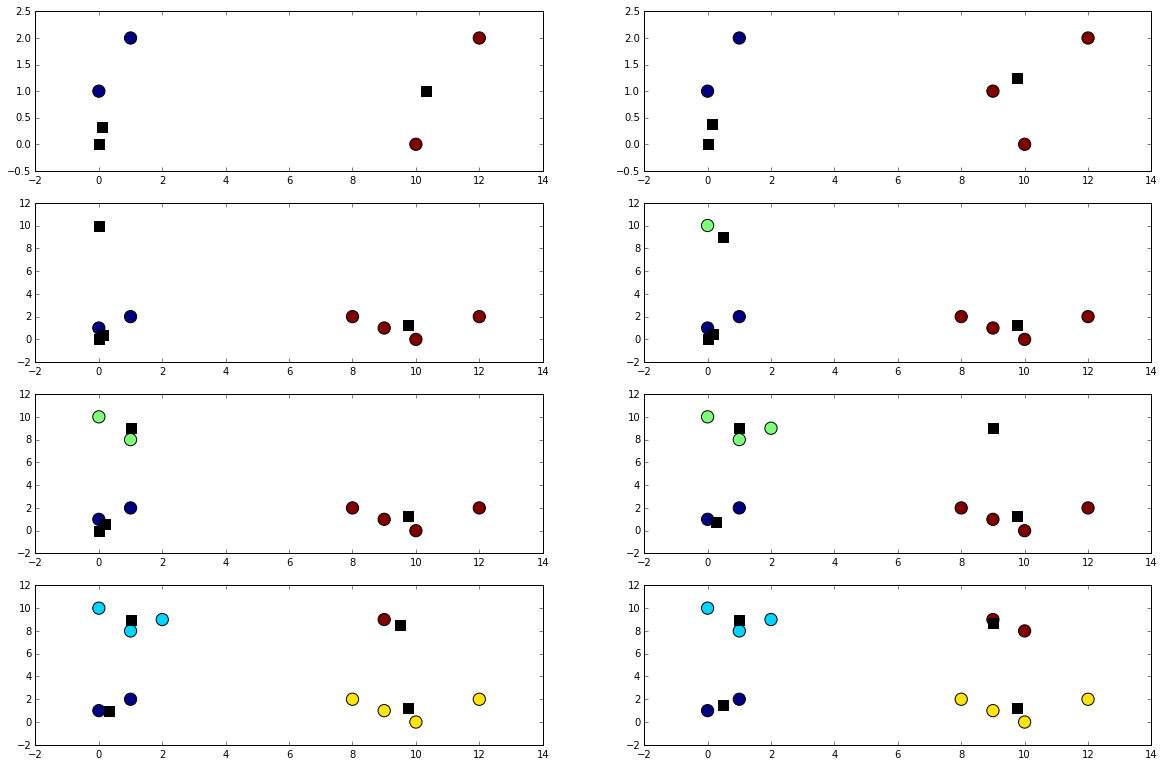

In [224]:
finalcenters=kmeans (centers, samples, 4, True)